# Импорт библиотек в проект

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
import sklearn as sk
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras_visualizer import visualizer
from tqdm.keras import TqdmCallback
import keras
import seaborn as sns
from keras import backend as K
import matplotlip.pyplot as plt

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
warnings.filterwarnings("ignore")

# Функция для нормализации колон

In [228]:
def normalisation(column):
    column = (column - min(column))
    column /= max(column)
    return column

# Считывание файла train.scv

In [229]:
df_train = pd.read_csv('train.csv')


In [274]:
cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape'
            ,'LandContour', 'Neighborhood', 'Condition1', 'Condition2'
            ,'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt'
            , 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st'
            , 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond'
            , 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'
            , 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'
            , 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath'
            , 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'
            , 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces'
            , 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish' 
            , 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'BsmtQual'
            , 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
num_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF'
            , '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea'
            , 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'
            , 'ScreenPorch', 'PoolArea']
df_num = df_train[num_cols]
df_cat = df_train[cat_cols]
df_num

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,65.0,8450,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,1145,1145,1053,0,2198,836,192,84,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,953,953,694,0,1647,460,0,40,0,0,0,0
1456,85.0,13175,1542,2073,0,0,2073,500,349,0,0,0,0,0
1457,66.0,9042,1152,1188,1152,0,2340,252,0,60,0,0,0,0
1458,68.0,9717,1078,1078,0,0,1078,240,366,0,112,0,0,0


#### Обработак категориальных признаков

In [275]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_cat)
df_cat = pd.DataFrame( data = enc.transform(df_cat).toarray(), columns=enc.get_feature_names(cat_cols)).astype(int)
df_cat = df_cat.astype('int64')

#### Обработка численных признаков


In [276]:
scaler = MinMaxScaler()
scaler.fit(df_num)
scaled_data = scaler.transform(df_num)
df_num = pd.DataFrame(data = scaled_data, columns = df_num.columns).astype('float64')
df_num

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,0.150685,0.033420,0.140098,0.119780,0.413559,0.0,0.259231,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0
1,0.202055,0.038795,0.206547,0.212942,0.000000,0.0,0.174830,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0
2,0.160959,0.046507,0.150573,0.134465,0.419370,0.0,0.273549,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0
3,0.133562,0.038561,0.123732,0.143873,0.366102,0.0,0.260550,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0
4,0.215753,0.060576,0.187398,0.186095,0.509927,0.0,0.351168,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.155974,0.142038,0.336077,0.0,0.247362,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0
1456,0.219178,0.055505,0.252373,0.399036,0.000000,0.0,0.327619,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0
1457,0.154110,0.036187,0.188543,0.195961,0.557869,0.0,0.377920,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0
1458,0.160959,0.039342,0.176432,0.170721,0.000000,0.0,0.140166,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0


#### Соединяем всё в один DataFrame

In [278]:
df_full = pd.concat([df_num, df_cat, df_train['SalePrice']], axis=1)
df_full.dropna(inplace=True)
df_full

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.150685,0.033420,0.140098,0.119780,0.413559,0.0,0.259231,0.386460,0.000000,0.111517,...,0,0,1,0,0,0,0,1,0,208500
1,0.202055,0.038795,0.206547,0.212942,0.000000,0.0,0.174830,0.324401,0.347725,0.000000,...,0,0,1,0,0,0,0,1,0,181500
2,0.160959,0.046507,0.150573,0.134465,0.419370,0.0,0.273549,0.428773,0.000000,0.076782,...,0,0,1,0,0,0,0,1,0,223500
3,0.133562,0.038561,0.123732,0.143873,0.366102,0.0,0.260550,0.452750,0.000000,0.063985,...,0,0,1,1,0,0,0,0,0,140000
4,0.215753,0.060576,0.187398,0.186095,0.509927,0.0,0.351168,0.589563,0.224037,0.153565,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.155974,0.142038,0.336077,0.0,0.247362,0.324401,0.000000,0.073126,...,0,0,1,0,0,0,0,1,0,175000
1456,0.219178,0.055505,0.252373,0.399036,0.000000,0.0,0.327619,0.352609,0.407235,0.000000,...,0,0,1,0,0,0,0,1,0,210000
1457,0.154110,0.036187,0.188543,0.195961,0.557869,0.0,0.377920,0.177715,0.000000,0.109689,...,0,0,1,0,0,0,0,1,0,266500
1458,0.160959,0.039342,0.176432,0.170721,0.000000,0.0,0.140166,0.169252,0.427071,0.000000,...,0,0,1,0,0,0,0,1,0,142125


#### Анализируем важность фичей

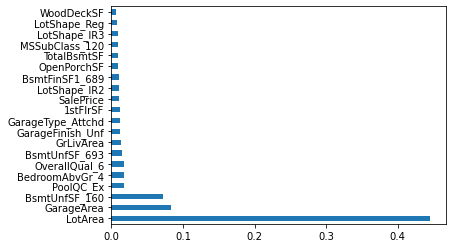

In [280]:
X = df_full.iloc[:, 1:] #independent columns
y = df_full.iloc[:,0]   #target column i.e price range
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
model = DecisionTreeRegressor()
model.fit(X,y)#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Создание массива с самыми важными фичами

In [281]:
array = list(feat_importances.nlargest(20).index)
array1 = ['GarageCars_3',
 'GrLivArea',
 'KitchenQual_Ex',
 'TotalBsmtSF',
 '2ndFlrSF',
 'KitchenQual_TA',
 'LotArea',
 'GarageArea',
 'WoodDeckSF',
 'OverallQual_8',
 'BedroomAbvGr_3',
 'CentralAir_N',
 'MasVnrType_Stone',
 'Exterior1st_BrkFace',
 'OverallQual_7',
 'Foundation_PConc',
 'BsmtFullBath_0',
 'YearRemodAdd_1997']

#### Произвадим анализ схожести фичей

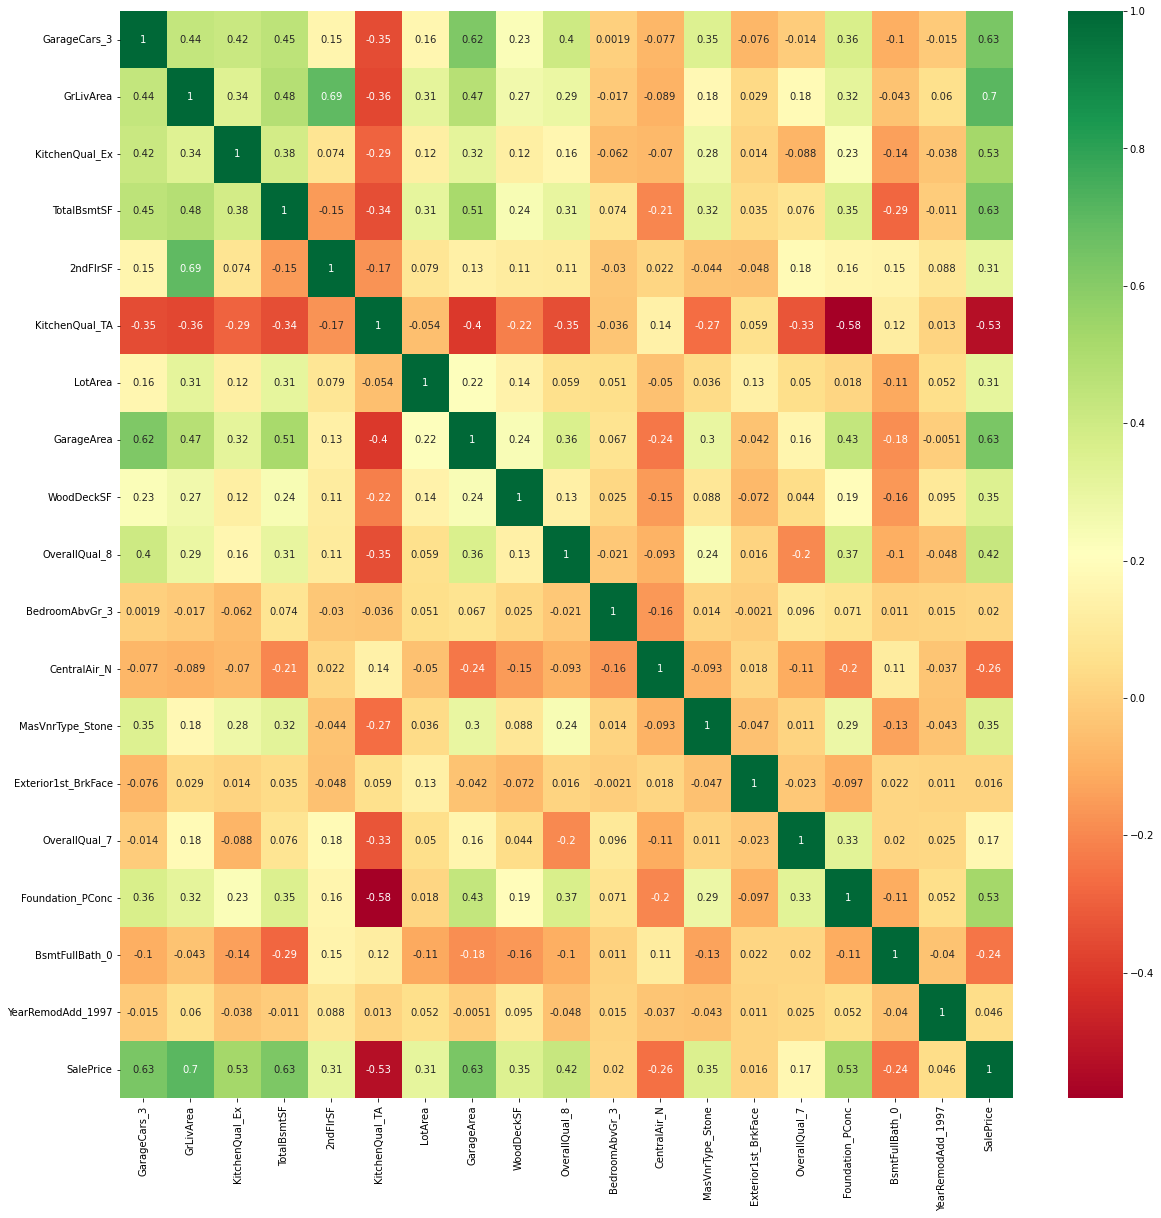

In [282]:
X = df_full[array1+['SalePrice']]
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Разделяем дата сет на тренеровачную и тестовую часть

In [283]:
x = df_full[array1]
y = df_full['SalePrice']
x_train, x_test = x[:1000], x[1000:]
y_train, y_test = y[:1000], y[1000:]

#### Параметры для каждой модели

In [285]:
parameters_cvs = {
    'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
              'C':[i for i in range(1, 16)],
              'degree':[i for i in range(1, 11)],
             'gamma': ['scale', 'auto']
             }
parametrs_LR ={'fit_intercept': [True, False],
              'copy_X':[True, False],
              'n_jobs':[i for i in range(1, 10)],
              'positive':[True, False]}
parametrs_KNR = {
        'n_neighbors':[i for i in range(0, 5)],
        'weights' : ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute' ]
    }
x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)
y_test


1211    164000.0
1212    113000.0
1214    134500.0
1215    125000.0
1216    112000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 201, dtype: float64

In [311]:
model_LR = LinearRegression()
model_KNN = KNeighborsRegressor()
model_cvs = svm.SVR()
def GridSearch(models, x, y):
    good_score = {}
    for i, j in tqdm(models.items()):
        clf = GridSearchCV(i, j)
        clf.fit(x, y)
        good_score[i] = clf.best_score_
    print(good_score)
GridSearch({
        model_LR : parametrs_LR,
    model_KNN : parametrs_KNR,
    model_cvs : parameters_cvs
    },x, y
)









  0%|          | 0/3 [00:00<?, ?it/s]







 33%|███▎      | 1/3 [00:01<00:02,  1.39s/it]







 67%|██████▋   | 2/3 [03:28<01:44, 104.19s/it][A


KeyboardInterrupt: 

In [342]:
neural_network_sell_house = Sequential()

neural_network_sell_house.add(  Dense(15, input_dim=18, activation='linear')  )
neural_network_sell_house.add(  Dense(30, activation='relu')  )
neural_network_sell_house.add( Dense(30, activation='relu') )
neural_network_sell_house.add(  Dense(1, activation='linear')  )
opt = keras.optimizers.Adam(learning_rate=0.005)
neural_network_sell_house.compile(loss='mse', optimizer=opt, metrics=[coeff_determination])

neural_network_sell_house.fit(x_train
          , y_train #тренируем нейронную сеть
          , epochs=300 #количество повторов во время обучения
          , validation_split = 0.5
          , batch_size=32
          , verbose=0, callbacks=[TqdmCallback(verbose=0)]) #красивый вывод обучения

0epoch [00:00, ?epoch/s]

In [343]:
answers = neural_network_sell_house.predict(x_test).T
neural_network_sell_house.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 2081575680.0000 - coeff_determination: 0.6075


[2081575680.0, 0.6074537038803101]

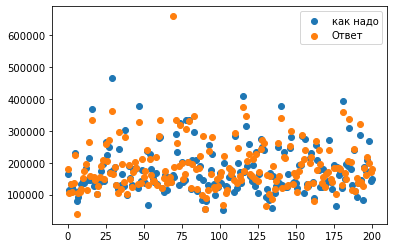

In [346]:
plt.scatter([i for i in range(0, len(y_test))] ,y_test, label= "как надо")
plt.scatter([i for i in range(0, len(answers[0]))], answers[0], label= 'Ответ')
plt.legend()
plt.show()

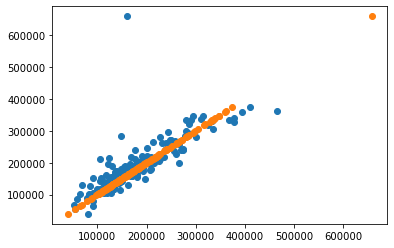

In [347]:
plt.scatter(y_test, answers[0])
plt.scatter(answers[0], answers[0])
plt.show()

In [378]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth=7)
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [379]:
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9308794429803988
0.6820554038001457


In [380]:
model_tree = DecisionTreeRegressor()

param_tree = {
    'criterion':['squared_error', "friedman_mse", "absolute_error", "poisson"],
    'splitter':['best', 'random'],
    'max_depth':[i for i in range(1, 16)],
    'min_samples_split':[i for i in range(1, 16)],
    'min_samples_leaf' : [i for i in range(1, 16)],
    'max_features' : ['auto', 'sqrt', 'log2']
}

def GridSearch(models, x, y):
    good_score = {}
    for i, j in tqdm(models.items()):
        clf = GridSearchCV(i, j)
        clf.fit(x, y)
        good_score[i] = clf.best_score_
    print(good_score)
GridSearch({
        model_tree : param_tree
    },x, y
)

100%|██████████| 1/1 [22:31<00:00, 1351.60s/it]

{DecisionTreeRegressor(): 0.7976153765718035}
